<a href="https://colab.research.google.com/github/jofmorenore/TimeSeries/blob/master/proyecto/01_IntroSeriesUnivariadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introducción a las Series Univariadas
Vamos a cargar los datos de las series de las tasas de interés. Los datos están tomados desde el 5 de enero de 1962, hasta el 10 de abril de 2009, para un total de 2467 observacione, con una periodicidad semanal.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.formula.api as smf # ols
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import ccf
from statsmodels.tsa.arima.model import ARIMA

In [2]:
%load_ext rpy2.ipython

In [3]:
r1=np.loadtxt(r'https://raw.githubusercontent.com/sacalderonv/TimeSeries/master/Series%20Univariadas/Bases%20de%20Datos/w-gs1yr.txt',skiprows=1,usecols = 3)
r1=pd.DataFrame({'rate':r1})
Fechas = pd.date_range('1/1/1962', periods=len(r1), freq='W')
r1=pd.Series(r1['rate'].values,Fechas,name='rate')
r1.head()

1962-01-07    3.24
1962-01-14    3.32
1962-01-21    3.29
1962-01-28    3.26
1962-02-04    3.29
Freq: W-SUN, Name: rate, dtype: float64

In [4]:
r3=np.loadtxt(r'https://raw.githubusercontent.com/sacalderonv/TimeSeries/master/Series%20Univariadas/Bases%20de%20Datos/w-gs3yr.txt',skiprows=1,usecols = 3)
r3=pd.DataFrame({'rate':r3})
Fechas = pd.date_range('1/1/1962', periods=len(r3), freq='W')
r3=pd.Series(r3['rate'].values,Fechas,name='rate')
r3.head()

1962-01-07    3.70
1962-01-14    3.75
1962-01-21    3.80
1962-01-28    3.77
1962-02-04    3.80
Freq: W-SUN, Name: rate, dtype: float64

## Gráficas de las Series

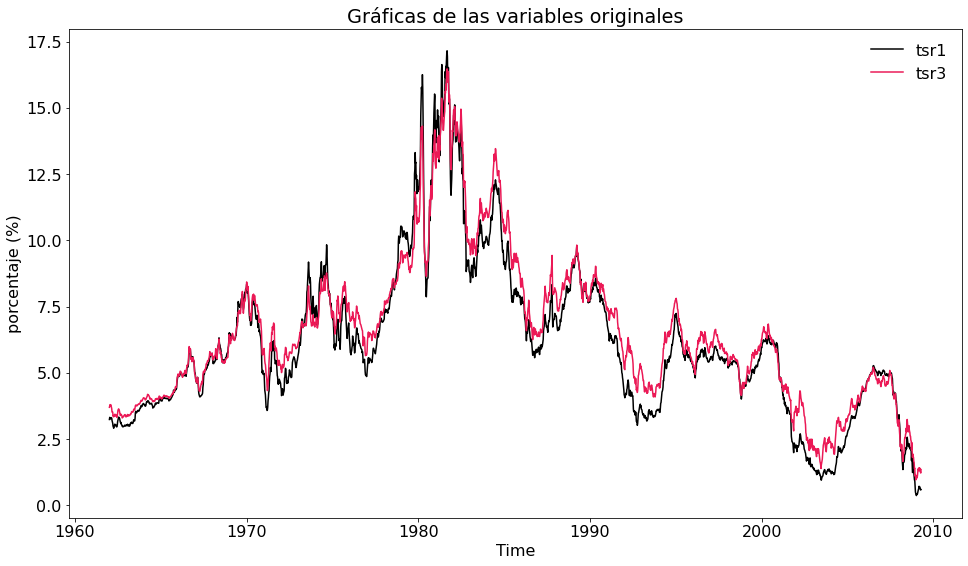

In [5]:
# grafico
plt.rc('font', size=16)
fig, ax = plt.subplots(figsize=(16, 9))

ax.set_xlabel(r'Time')
ax.set_ylabel(r'porcentaje (%)')
ax.plot(r1, color = '#000000', label = 'tsr1')
ax.plot(r3, color = '#EB1956', label = 'tsr3')
ax.set_title('Gráficas de las variables originales')
ax.legend(loc = 0, frameon = False)

plt.show()

# Diagramas de Dispersión

Vamos a hacer la gráficas de dispersión de las variables directamente, y de las variables en cambios(transformadas). La ccf o función de autocorrelación cruzada se define como las correlaciones entre $X_{t+h}$ y $Y_t$ para $h=0,\pm1 \pm2,\cdots$

In [6]:
tsc1=pd.Series(r1.diff(periods=1),Fechas,name='rate').dropna()
tsc3=pd.Series(r3.diff(periods=1),Fechas,name='rate').dropna()
tsc3.head()

1962-01-14    0.05
1962-01-21    0.05
1962-01-28   -0.03
1962-02-04    0.03
1962-02-11   -0.04
Freq: W-SUN, Name: rate, dtype: float64

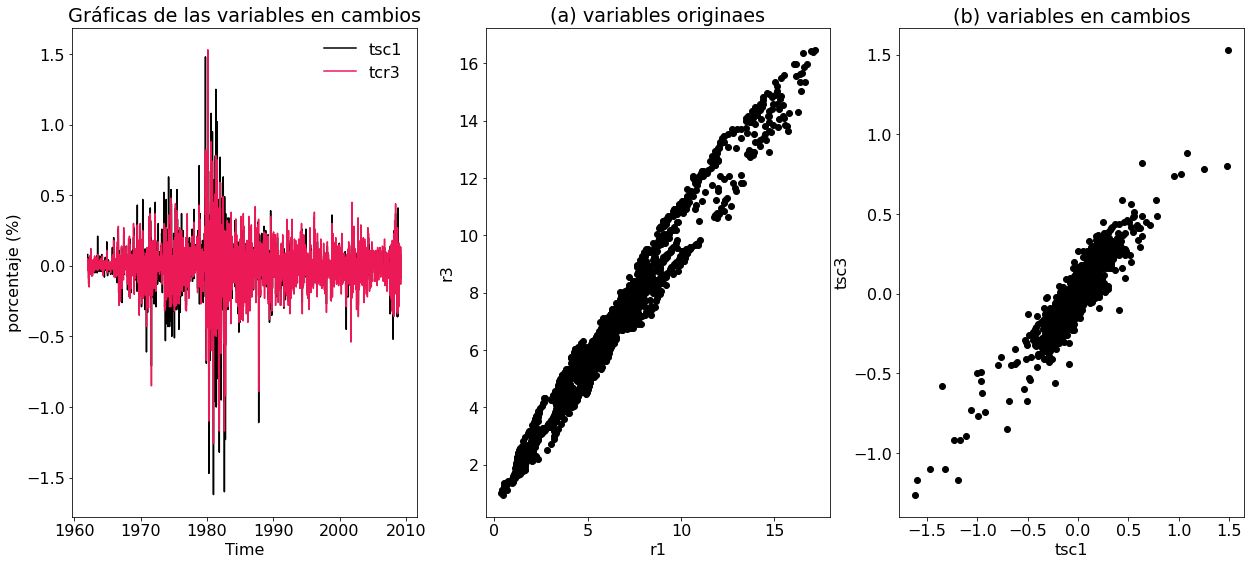

In [7]:
# grafico
f, axes = plt.subplots(1, 3, figsize = (21,9))
plt.subplots_adjust(wspace = 0.2, hspace = 0.4)

axes[0].set_xlabel(r'Time')
axes[0].set_ylabel(r'porcentaje (%)')
axes[0].plot(tsc1, color = '#000000', label = 'tsc1')
axes[0].plot(tsc3, color = '#EB1956', label = 'tcr3')
axes[0].set_title('Gráficas de las variables en cambios')
axes[0].legend(loc = 0, frameon = False)

axes[1].set_xlabel('r1')
axes[1].set_ylabel('r3')
axes[1].scatter(r1, r3, color = '#000000') 
axes[1].set_title('(a) variables originaes')

axes[2].set_xlabel('tsc1')
axes[2].set_ylabel('tsc3')
axes[2].scatter(tsc1, tsc3, color = '#000000') 
axes[2].set_title('(b) variables en cambios')


plt.show()

# Ajuste Variables Originales

Primer ajuste de regresión para las series originales asumiendo que los ruidos son IID, es decir vamos a ajustar el modelo
$$r_{3t}=\alpha+\beta r_{1t}+e_t$$

In [8]:
r3_r1 = pd.DataFrame(np.array(r3), columns=['r3'])
r3_r1['r1']=np.array(r1)
m1 = smf.ols(formula = "r3 ~ r1", data = r3_r1).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:                     r3   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 6.781e+04
Date:                Mon, 10 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:35:08   Log-Likelihood:                -1899.6
No. Observations:                2467   AIC:                             3803.
Df Residuals:                    2465   BIC:                             3815.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8321      0.024     34.432      0.0

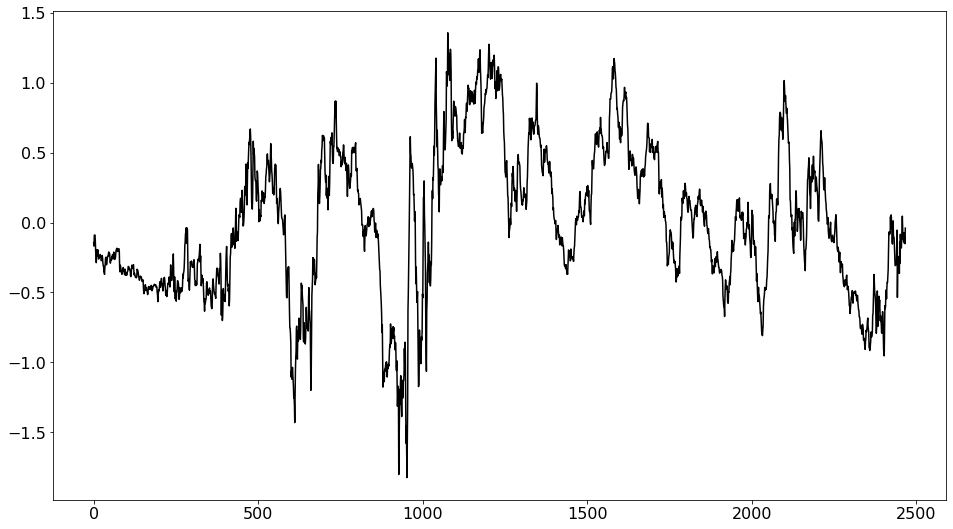

In [9]:
f, axes = plt.subplots(figsize = (16,9))

axes.plot(m1.resid, color = '#000000', label = 'tsc1')

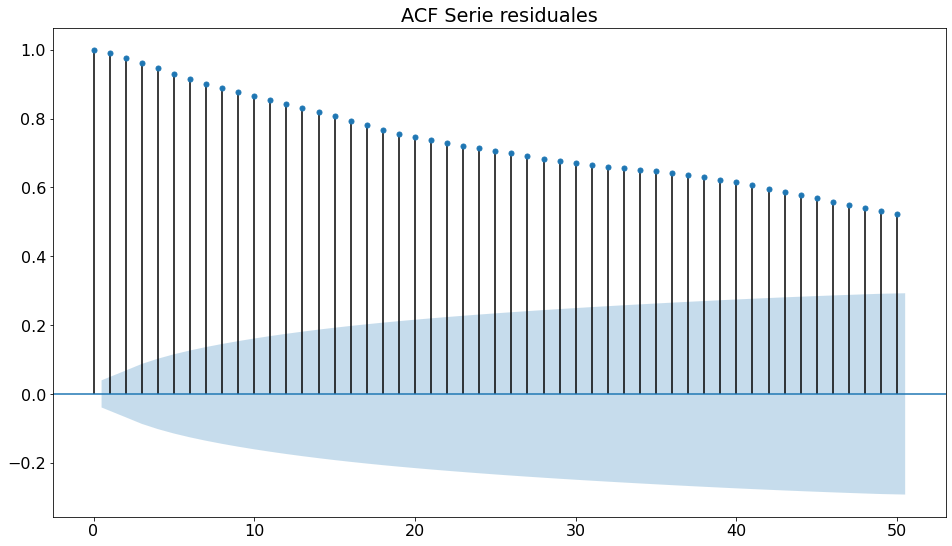

In [10]:
plt.rcParams["figure.figsize"] = (16,9)
res=plot_acf(m1.resid,adjusted=False,lags=50,title='ACF Serie residuales')

# Ajuste cambios en tasas

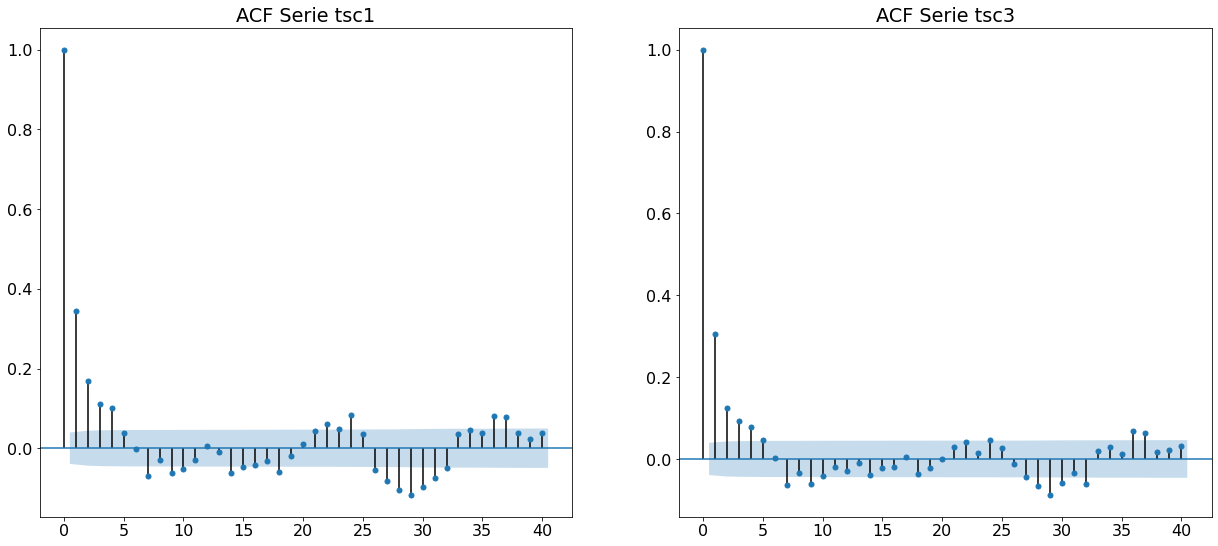

In [11]:
fig, ax = plt.subplots(1,2,figsize=(21,9))
plot_acf(tsc1, lags=40, ax=ax[0],title='ACF Serie tsc1')
plot_acf(tsc3, lags=40, ax=ax[1],title='ACF Serie tsc3')
plt.show()

Note que en el ajuste del modelo, las pruebas sobre los parámetros resultan  significativas, es decir son diferentes de cero. Vale la pena notar también que los residuales del modelo paracen no ser IID, en el sentido que no todos presentan la misma distribución, por ejemplo, la media de las observaciones antes del tiempo t=1000 parace ser muy distinta a la medias después del tiempo t=1000. Adicionalmente, al ver la estructural de autocorrelación temporal, podemos ver que los residuales resultan altamente autocorrelacionados violando el supuesto de independencia. En términos de econometría, lo que quiere decir esto es que las dos variables no están cointegradas, es decir, no hay una relación de equilibrio a largo plazo(estacionaria) entre las dos variables. 

Vesmos ahora el ajuste de los cambios de las tasas.

In [ ]:
%%R
install.packages("forecast")
library(forecast)

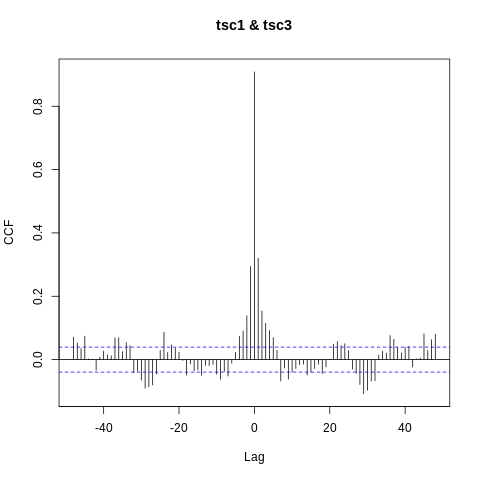

In [13]:
#calculate cross correlation
#f, axes = plt.subplots(figsize = (16,9))
#axes.plot(ccf(tsc1['rate'].dropna(), tsc3['rate'].dropna(), adjusted=False))
%%R -i tsc1 -i tsc3
options(repr.plot.width=8, repr.plot.height=6)
forecast::Ccf(tsc1, tsc3, lag.max = 48)

Veamos ahora el ajuste de los cambios de las tasas.

In [14]:
tsc3_tsc1 = pd.DataFrame(np.array(tsc3), columns=['tsc3'])
tsc3_tsc1['tsc1']=np.array(tsc1)
m2 = smf.ols(formula = "tsc3 ~ -1+tsc1", data = tsc3_tsc1).fit()
print(m2.summary())

                                 OLS Regression Results                                
Dep. Variable:                   tsc3   R-squared (uncentered):                   0.825
Model:                            OLS   Adj. R-squared (uncentered):              0.825
Method:                 Least Squares   F-statistic:                          1.165e+04
Date:                Mon, 10 Oct 2022   Prob (F-statistic):                        0.00
Time:                        17:36:35   Log-Likelihood:                          3096.0
No. Observations:                2466   AIC:                                     -6190.
Df Residuals:                    2465   BIC:                                     -6184.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

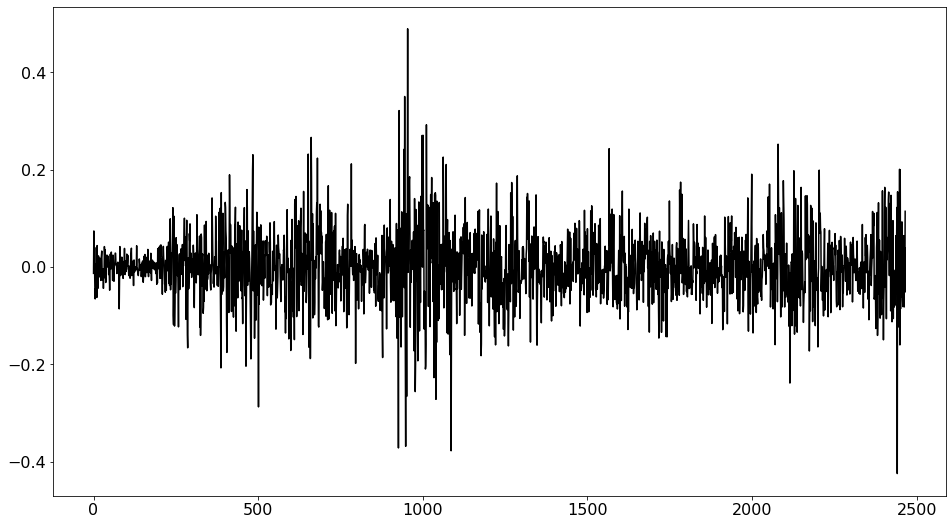

In [15]:
f, axes = plt.subplots(figsize = (16,9))

axes.plot(m2.resid, color = '#000000', label = 'tsc1')

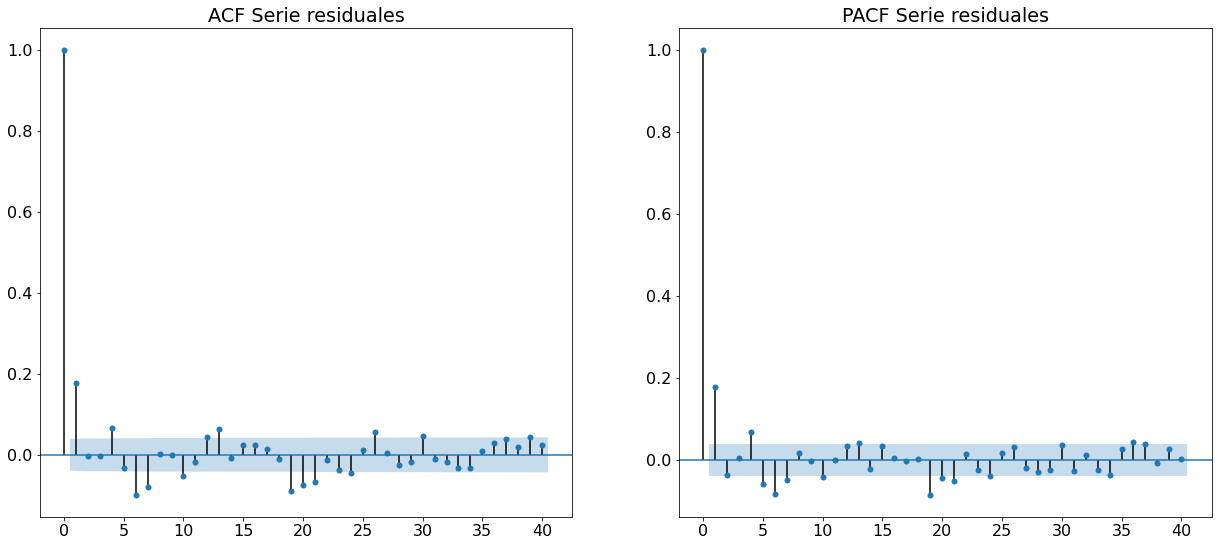

In [16]:
fig, ax = plt.subplots(1,2,figsize=(21,9))
plot_acf(m2.resid, lags=40, ax=ax[0],title='ACF Serie residuales')
plot_pacf(m2.resid, lags=40, ax=ax[1],title='PACF Serie residuales')
plt.show()

Note que la pendiente de la regresión resulta significativa, y ahora los residuales parecen estables y aunque persiste la autocorrelación, ésta no es tan fuerte. Como persiste la autocorrelación, usaremos un modelo de series de tiempo para que tenga en cuenta la estructura de autcorrelación presente en los residuales.

In [17]:
m3 = ARIMA(tsc3, order=(0,0,1), exog=tsc1, trend='n').fit()
print(m3.summary())

                               SARIMAX Results                                
Dep. Variable:                   rate   No. Observations:                 2466
Model:                 ARIMA(0, 0, 1)   Log Likelihood                3136.615
Date:                Mon, 10 Oct 2022   AIC                          -6267.231
Time:                        17:36:37   BIC                          -6249.800
Sample:                    01-14-1962   HQIC                         -6260.898
                         - 04-12-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
rate           0.7936      0.003    227.292      0.000       0.787       0.800
ma.L1          0.1824      0.013     13.699      0.000       0.156       0.208
sigma2         0.0046   7.66e-05     60.017      0.0

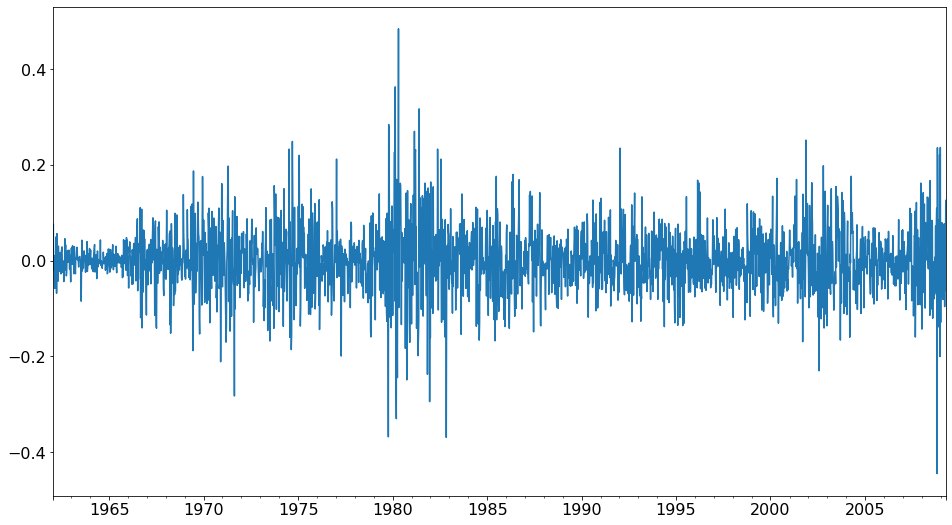

In [18]:
m3.resid.plot()
plt.show()

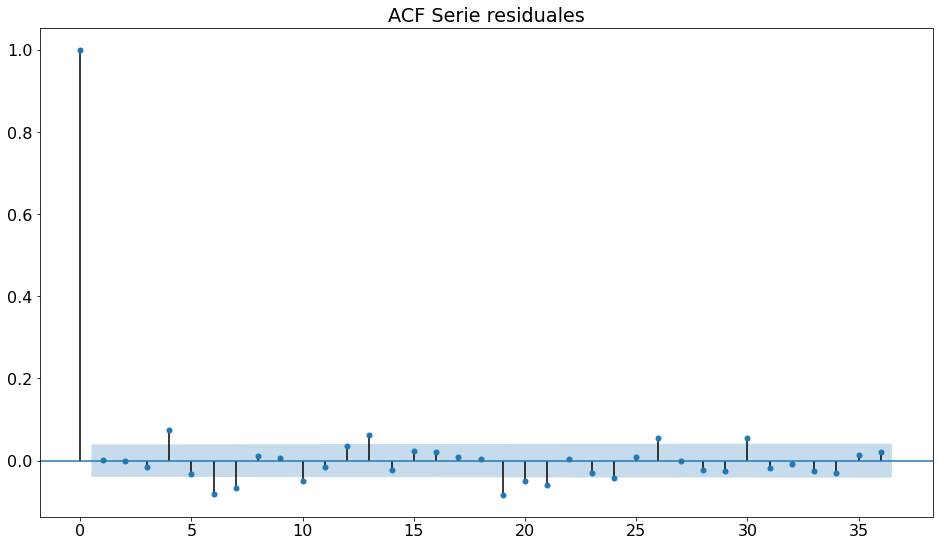

In [19]:
res=plot_acf(m3.resid,lags=36,title='ACF Serie residuales')

Note que ahora los residuales son prácticamente no autcorrelacionados. Vale la pena decir que aún hay una característica que sigue presente y es la heterocedasticidad condicional, la cual estudiaremos mas adelante. Esta alternativa de diferenciar las series fue muy popular, pero tiene multiples dificultades, por ejemplo la interpretabilidad, la baja eficiencia de los estimadores, entre otros, ver Libro de Peña(2010) Página 542.

# GLS

In [20]:
Ajuste_arima_res = ARIMA(m2.resid, order=(0,0,1), trend='n').fit()
print(m3.summary())

                               SARIMAX Results                                
Dep. Variable:                   rate   No. Observations:                 2466
Model:                 ARIMA(0, 0, 1)   Log Likelihood                3136.615
Date:                Mon, 10 Oct 2022   AIC                          -6267.231
Time:                        17:36:38   BIC                          -6249.800
Sample:                    01-14-1962   HQIC                         -6260.898
                         - 04-12-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
rate           0.7936      0.003    227.292      0.000       0.787       0.800
ma.L1          0.1824      0.013     13.699      0.000       0.156       0.208
sigma2         0.0046   7.66e-05     60.017      0.0

In [ ]:
%%R 
install.packages("nlme")
corr = nlme::corARMA(value=c(0.18),p = 0, q = 1)

In [22]:
%%R -i tsc3_tsc1
salida_concorrelacion=nlme::gls(tsc3 ~-1+ tsc1,tsc3_tsc1,correlation = corr)
summary(salida_concorrelacion)

Generalized least squares fit by REML
  Model: tsc3 ~ -1 + tsc1 
  Data: tsc3_tsc1 
        AIC       BIC   logLik
  -6259.295 -6241.865 3132.647

Correlation Structure: ARMA(0,1)
 Formula: ~1 
 Parameter estimate(s):
   Theta1 
0.1823935 

Coefficients:
         Value   Std.Error  t-value p-value
tsc1 0.7935854 0.007546348 105.1615       0

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-6.16894775 -0.52371961 -0.02063256  0.49959849  7.12568462 

Residual standard error: 0.06895341 
Degrees of freedom: 2466 total; 2465 residual


Note que este resultado es análogo al obtenido al hacer la regresión con errores ARMA de la función Arima.

# Lluvias mensuales ponderadas para Colombia


In [23]:
Lluvia=pd.read_excel(r'https://github.com/sacalderonv/TimeSeries/blob/master/Series%20Univariadas/R/Identificaci%C3%B3n%20AR%20y%20MA%20Puros%20Usando%20ACF%20y%20PACF/Lluvia.xlsx?raw=true')
Lluvia['Fecha']=pd.to_datetime(Lluvia['Fecha'])
Lluvia=pd.Series(Lluvia['lluvia'].values,Lluvia['Fecha'],name='lluvia')
Lluvia.index.freq='MS'
Lluvia.head(10)

Fecha
2009-01-01    3.758065
2009-02-01    4.235714
2009-03-01    4.764516
2009-04-01    5.400000
2009-05-01    4.438710
2009-06-01    6.963333
2009-07-01    6.138710
2009-08-01    5.325806
2009-09-01    3.293333
2009-10-01    5.483871
Freq: MS, Name: lluvia, dtype: float64

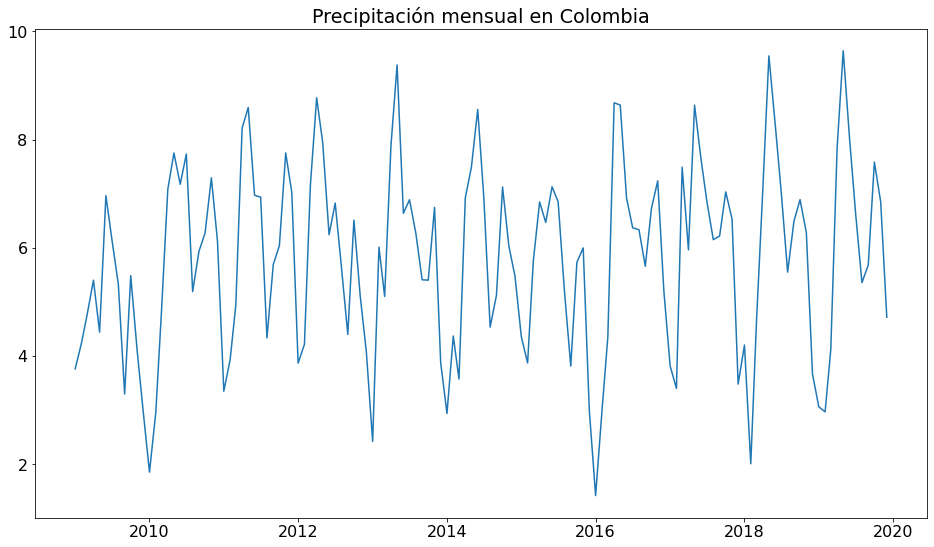

In [24]:
plt.plot(Lluvia)
plt.title('Precipitación mensual en Colombia')
plt.show()

# Índice COLCAP

In [25]:
Colcap=pd.read_excel(r'https://github.com/sacalderonv/TimeSeries/blob/master/Series%20Univariadas/R/Descomposici%C3%B3n%20de%20un%20Serie%20de%20Tiempo/Datos%20hist%C3%B3ricos%20COLCAP-3.xlsx?raw=true')
Colcap['Fecha']=pd.to_datetime(Colcap['Fecha'])
Colcap=pd.Series(Colcap['Ultimo'].values,Colcap['Fecha'],name='ValorCOLCAP')
Colcap2=Colcap.resample('D').first()
[Colcap.head(10), Colcap2.head(10)]

[Fecha
 2016-02-10    1200.42
 2016-02-11    1198.51
 2016-02-12    1209.03
 2016-02-15    1209.88
 2016-02-16    1199.98
 2016-02-17    1233.34
 2016-02-18    1235.89
 2016-02-19    1234.93
 2016-02-22    1236.37
 2016-02-23    1229.65
 Name: ValorCOLCAP, dtype: float64, Fecha
 2016-02-10    1200.42
 2016-02-11    1198.51
 2016-02-12    1209.03
 2016-02-13        NaN
 2016-02-14        NaN
 2016-02-15    1209.88
 2016-02-16    1199.98
 2016-02-17    1233.34
 2016-02-18    1235.89
 2016-02-19    1234.93
 Freq: D, Name: ValorCOLCAP, dtype: float64]

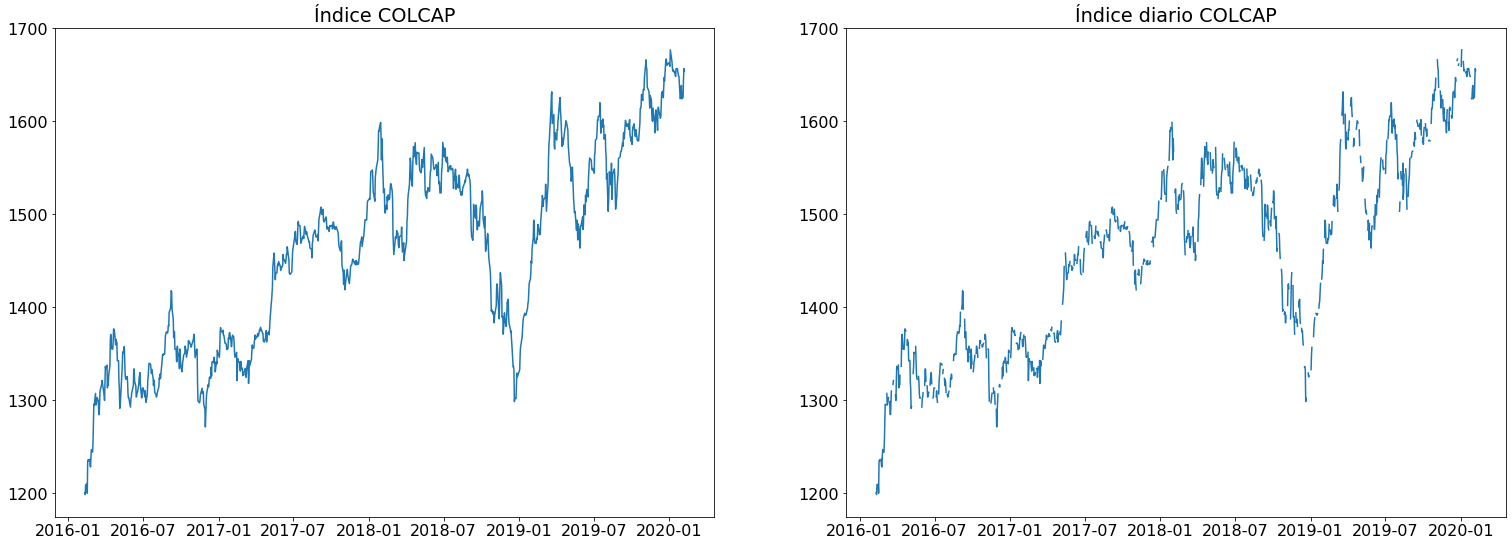

In [26]:
# grafico
f, axes = plt.subplots(1, 2, figsize = (26,9))
plt.subplots_adjust(wspace = 0.2, hspace = 0.4)

axes[0].plot(Colcap)
axes[0].set_title('Índice COLCAP')

axes[1].plot(Colcap2)
axes[1].set_title('Índice diario COLCAP')

plt.show()

# Serie mensual de pasajeros

In [27]:
data=pd.read_csv(r'https://raw.githubusercontent.com/sacalderonv/TimeSeries/master/Series%20Univariadas/Bases%20de%20Datos/AirPassengers.csv')
data['Month']=pd.to_datetime(data['Month'])
pasajeros=pd.Series(data['NPassengers'].values,data['Month'],name='NPassengers')
pasajeros.index.freq='MS'
pasajeros.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Freq: MS, Name: NPassengers, dtype: int64

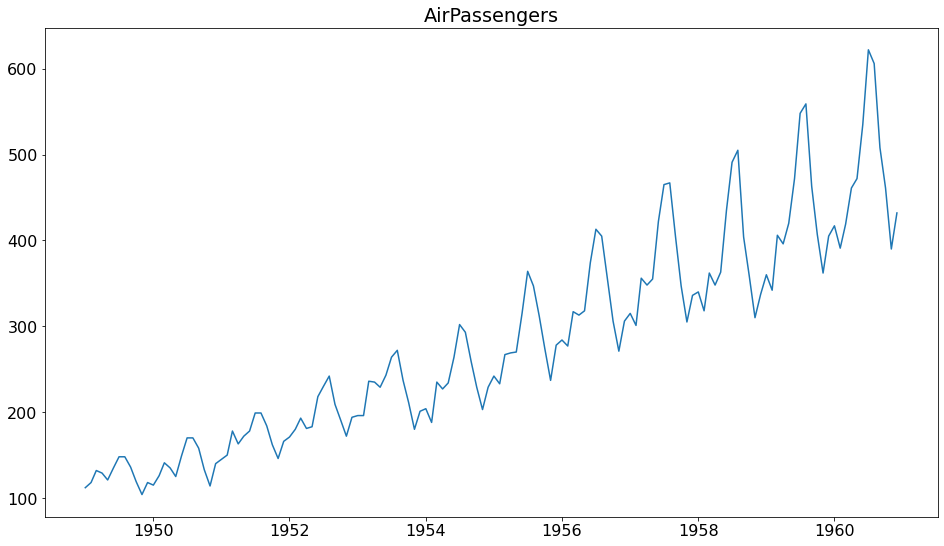

In [28]:
plt.plot(pasajeros)
plt.title('AirPassengers')
plt.show()